In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys
import time
import sklearn
import tensorflow as tf
from tensorflow import keras
import pandas as pd

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd,  sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.1.0
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
matplotlib 3.2.0
numpy 1.18.1
pandas 1.0.1
sklearn 0.22.2.post1
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state =7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state =11)

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3870, 8) (3870,)
(11610, 8) (11610,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)


In [5]:
# RandomizedSearchCV
# 1. transform to sklearn model
# 2. definite parameter collections
# 3. search parameters
def build_model(hidden_layers = 1,
                layer_size = 30,
                learning_rate = 3e-3):

    model = keras.models.Sequential()
    model.add(keras.layers.Dense(layer_size, activation = 'relu', input_shape = x_train.shape[1:]))
    for _ in range(hidden_layers-1):
        model.add(keras.layers.Dense(layer_size, activation = 'relu'))
    out_put = model.add(keras.layers.Dense(1))

    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss = 'mse', optimizer = optimizer)
    return model

sklearn_model = keras.wrappers.scikit_learn.KerasRegressor(build_model)
callbacks = [keras.callbacks.EarlyStopping(patience = 5,
                                           min_delta = 1e-2)]
history = sklearn_model.fit(x_train_scaled, y_train,
                  epochs = 100,
                  validation_data = [x_valid_scaled, y_valid],
                  callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 72us/sample - loss: 1.0495 - val_loss: 0.6311
Epoch 2/100
11610/11610 [==============================] - 1s 43us/sample - loss: 0.5524 - val_loss: 0.5713
Epoch 3/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.5106 - val_loss: 0.5346
Epoch 4/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4882 - val_loss: 0.5119
Epoch 5/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4732 - val_loss: 0.4949
Epoch 6/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4592 - val_loss: 0.4827
Epoch 7/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4490 - val_loss: 0.4741
Epoch 8/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.4466 - val_loss: 0.4632
Epoch 9/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.436

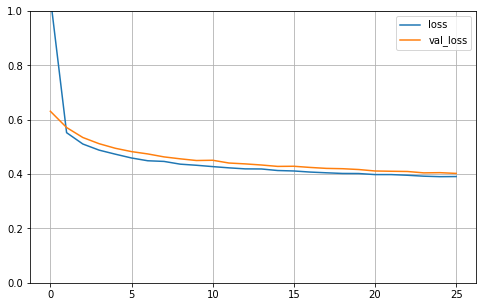

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize = (8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)